CAMB Python example notebook

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
# make sure the version and path is what you expect
from numpy import random

Using CAMB 1.6.0 installed at /home/grads/miniconda/envs/bela/lib/python3.10/site-packages/camb


In [2]:
#Set up a new set of parameters for CAMB
#The defaults give one massive neutrino and helium set using BBN consistency
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

In [3]:
#calculate results for these parameters
results = camb.get_results(pars)

In [4]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


(3051, 4)


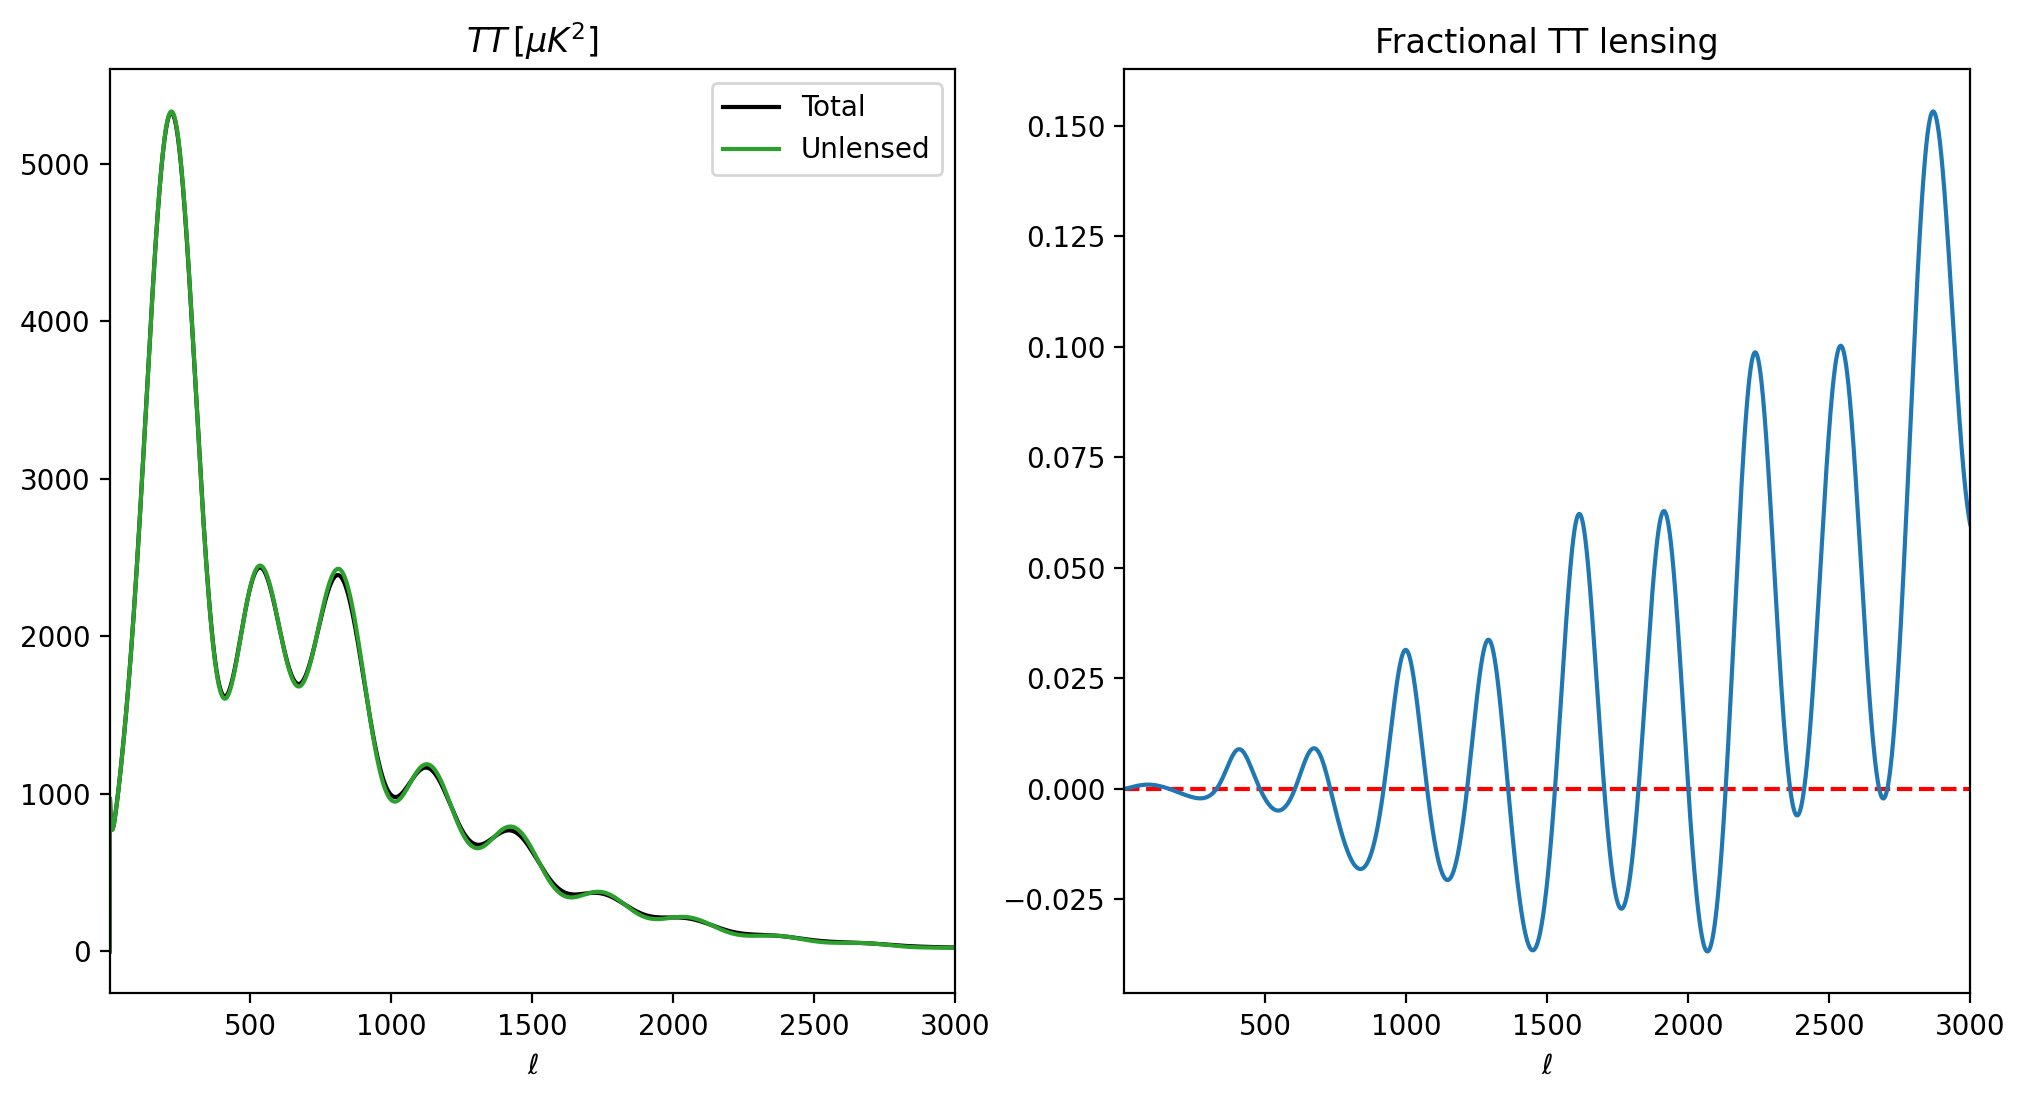

In [5]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(1,2, figsize = (12,6))
ax[0].plot(ls,totCL[:,0], color='k', label = "Total")
ax[0].plot(ls,unlensedCL[:,0], color='C2', label = "Unlensed")
ax[0].legend()
ax[0].set_title(r'$TT\, [\mu K^2]$')
ax[1].plot([2,3000],[0,0], color = "red", linestyle = "--")
ax[1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0]);
ax[1].set_title(r'Fractional TT lensing')
for ax in ax.reshape(-1): 
    ax.set_xlim([2,3000])
    ax.set_xlabel(r'$\ell$');

In [6]:
l_bound = [50,0.005,0.05,1.7,0.8]
u_bound = [80,0.04 ,0.2,3.3,1.2]
n=10
cosmos = np.random.uniform(low=l_bound, high=u_bound, size=(n,5))

In [7]:
pars = [camb.set_params(H0 = cosmos[i,0], ombh2=cosmos[i,1], omch2=cosmos[i,2], mnu=0.06, omk=0, tau=0.06,  
                           As=np.exp(cosmos[i,3])/(1e10), ns=cosmos[i,4], halofit_version='mead', lmax=3000)for i in range(len(cosmos))]
results = [camb.get_results(pars[i]) for i in range(len(cosmos))]
powers = [results[i].get_cmb_power_spectra(pars[i], CMB_unit = 'muK') for i in range(len(cosmos))]

In [8]:
totCL = [powers[i]["total"] for i in range(len(cosmos))]
unlensedCL = [powers[i]["unlensed_scalar"] for i in range(len(cosmos))]

In [9]:
totals = [totCL[i][2:,0] for i in range(len(cosmos))]
unlensed = [unlensedCL[i][2:,0] for i in range(len(cosmos))]
fractional = [1 - unlensedCL[i][2:,0]/totCL[i][2:,0] for i in range(len(cosmos))]

In [10]:
ls = np.arange(len(totals[0]))

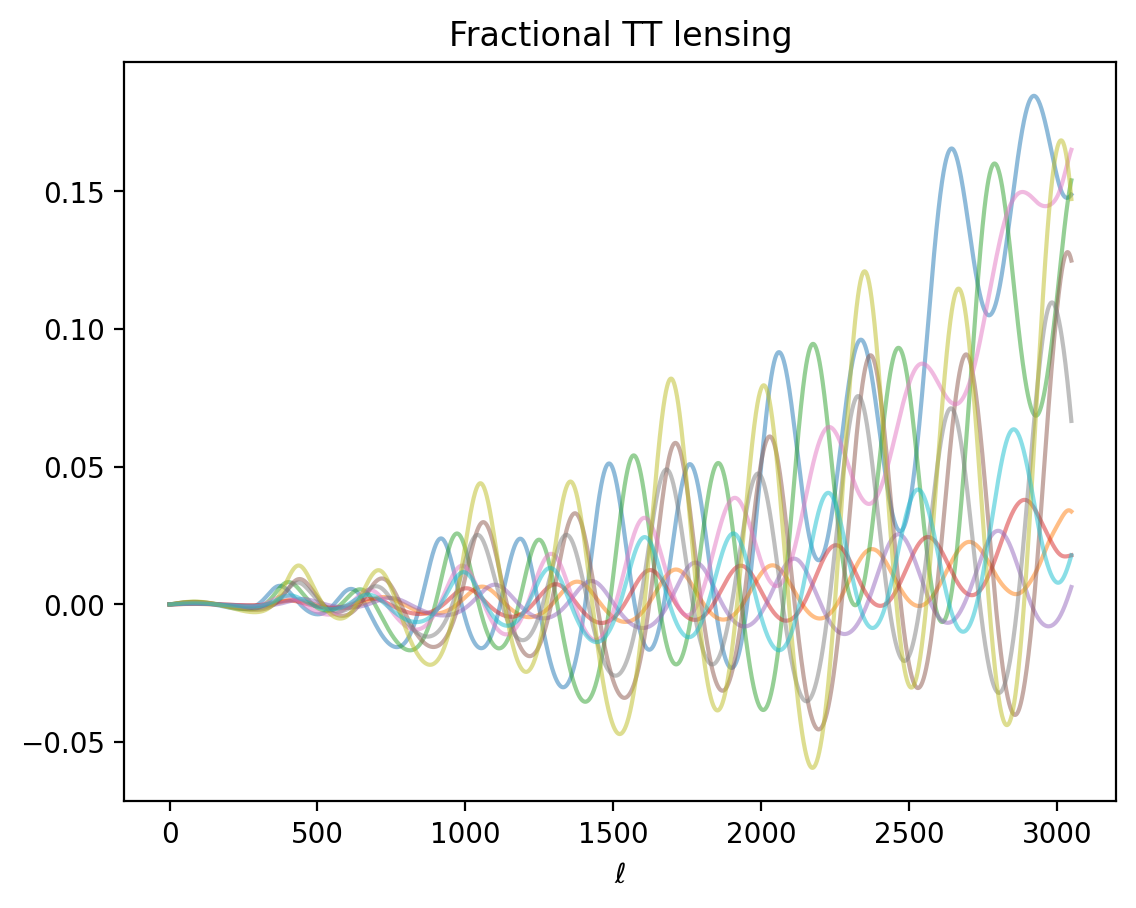

In [11]:
for i in range(len(cosmos)):
    plt.plot(ls, fractional[i], alpha = 0.5)
plt.xlabel(r'$\ell$')
plt.title(r'Fractional TT lensing')
plt.show()

In [39]:
np.save("random_cosmo_parameters", cosmos)
np.save("random_cosmo_totals", totals)
np.save("random_cosmo_unlens", unlensed)
np.save("random_cosmo_frac", fractional)

In [45]:
#np.load("random_cosmo_parameters.npy")